In [1]:
# general 
import datetime

# data analysis and wrangling
import pandas as pd

import numpy as np

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pickling
import pickle

%matplotlib inline

### Static Variables

In [2]:
line = "15"

### Reading Dataframe

In [3]:
#Read in the data from a csv file using Pandas
df = pd.read_csv("bus_data/line_data/" + line + ".csv", low_memory=False, header=None)
df.columns = ["Timestamp", "LineID", "JourneyPatternID", "TimeFrame", 
              "VehicleJourneyID", "Lon", "Lat", "VehicleID", "StopID", 
              "AtStop", "HumanTime", "Day", "Hour", "Runtime"]

In [186]:
df_1 = df[df.JourneyPatternID == 1]
df_1

,Timestamp,LineID,JourneyPatternID,TimeFrame,VehicleJourneyID,Lon,Lat,VehicleID,StopID,AtStop,HumanTime,Day,Hour,Runtime
0,1352181644000000,15,1,2012-11-06,5891,-6.153783,53.402687,33553,6319,1,2012-11-06 06:00:44,1,6,0
1,1352181825000000,15,1,2012-11-06,5891,-6.163521,53.399288,33553,4594,1,2012-11-06 06:03:45,1,6,181
2,1352181904000000,15,1,2012-11-06,5891,-6.173066,53.402138,33553,4595,1,2012-11-06 06:05:04,1,6,260
4,1352181944000000,15,1,2012-11-06,5891,-6.177130,53.402370,33553,4596,1,2012-11-06 06:05:44,1,6,300
5,1352182003000000,15,1,2012-11-06,5891,-6.181091,53.401699,33553,4563,1,2012-11-06 06:06:43,1,6,359
7,1352182084000000,15,1,2012-11-06,5891,-6.184258,53.399723,33553,1218,1,2012-11-06 06:08:04,1,6,440
8,1352182166000000,15,1,2012-11-06,5891,-6.187183,53.396484,33553,1270,1,2012-11-06 06:09:26,1,6,522
9,1352182245000000,15,1,2012-11-06,5899,-6.153783,53.402687,33498,6319,1,2012-11-06 06:10:45,1,6,0
10,1352182285000000,15,1,2012-11-06,5891,-6.195288,53.391106,33553,1273,1,2012-11-06 06:11:25,1,6,641
12,1352182342000000,15,1,2012-11-06,5891,-6.198000,53.388981,33553,1274,1,2012-11-06 06:12:22,1,6,698


### Preparing Data

In [187]:


# df['StopID'] = df['StopID'].astype('str')

### Training on entire dataset

In [206]:
# Setting up descriptive & target features

features = ["Day", "Hour", "JourneyPatternID", "StopID",]# "JourneyPatternID"] #'LineID', 'JourneyPatternID']

# converting to categories

for feature in features:
    df[feature] = df[feature].astype('category')
    
X = pd.concat([df[features]], axis=1)
y = df.Runtime

X.head()

,Day,Hour,JourneyPatternID,StopID
0,1,6,1,6319
1,1,6,1,4594
2,1,6,1,4595
3,1,6,1001,1153
4,1,6,1,4596


In [207]:
rfc = RandomForestRegressor(n_estimators=100, max_features='auto', oob_score=True, random_state=1)

In [208]:
rfc.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [209]:
rfc_predictions = rfc.predict(X)

In [210]:
# print("Accuracy: ", metrics.accuracy_score(y, rfc_predictions))
# print("Confusion matrix: \n", metrics.confusion_matrix(y, rfc_predictions))
# print("Classification report:\n ", metrics.classification_report(y, rfc_predictions))

print("R Squared: ", metrics.r2_score(y, rfc_predictions))
print("neg_mean_absolute_error: ", metrics.mean_absolute_error(y, rfc_predictions))
print("mean_squared_error: ", metrics.mean_squared_error(y, rfc_predictions))
print("median_absolute_error: ", metrics.median_absolute_error(y, rfc_predictions))

R Squared:  0.860544037607
neg_mean_absolute_error:  339.403292273
mean_squared_error:  333904.990996
median_absolute_error:  209.940263601


In [211]:
true_v_pred = pd.DataFrame({'Actual Value': y, 'Predicted Value': rfc_predictions, 'Hour': df.Hour, 'Day': df.Day})
true_v_pred

,Actual Value,Day,Hour,Predicted Value
0,0,1,6,132.016496
1,181,1,6,288.281988
2,260,1,6,372.757626
3,0,1,6,358.871568
4,300,1,6,402.389971
5,359,1,6,481.591927
6,99,1,6,413.985687
7,440,1,6,555.833013
8,522,1,6,619.846134
9,0,1,6,132.016496


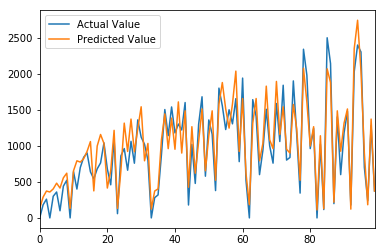

In [212]:
true_v_pred.head(100).plot()

In [215]:
# pickling the model to be used later
filename = 'bus_data/sklearn_models/line15_all_RF.sav'
pickle.dump(rfc, open(filename, 'wb'))

### Testing with custom values

In [203]:
params = {
    'Day': [2, 2, 2, 2, 2, 2,],
    'Hour': [14, 14, 14, 14, 14, 14,],
#     'LineID': [15, 15, 15, 15, 15, 15,],
    'JourneyPatternID': [1, 1, 1, 1, 1, 1,],
    'StopID': [6318, 1218, 617, 1017, 1077, 1081],

}

tester = pd.DataFrame(params)

for feature in list(tester):
    tester[feature] = tester[feature].astype('category')


pred = rfc.predict(tester)
print(pred)

[    0.           582.35369647  1579.74885536  2938.27513833  3419.84234158
  3689.97788638]


In [204]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print(importances)


[ 0.01566247  0.06814916  0.20611842  0.71006996]


#### Can't seem to have StopID before the end of the dataframe. If we do put it there, it makes every prediction the same. 

### Train-test split

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [177]:
# Fit model on training dataset
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [178]:
# Predicted class labels for test examples, 
rfc_predictions = rfc.predict(X_test)

In [179]:
# Accuracy metrics

print("R Squared: ", metrics.r2_score(y_test, rfc_predictions))
print("neg_mean_absolute_error: ", metrics.mean_absolute_error(y_test, rfc_predictions))
print("mean_squared_error: ", metrics.mean_squared_error(y_test, rfc_predictions))
print("median_absolute_error: ", metrics.median_absolute_error(y_test, rfc_predictions))

R Squared:  0.840677759875
neg_mean_absolute_error:  368.129667258
mean_squared_error:  380195.727124
median_absolute_error:  228.595143565


In [180]:
true_v_pred = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': rfc_predictions})
true_v_pred = true_v_pred.reset_index()
true_v_pred = true_v_pred.drop('index', 1)
true_v_pred

,Actual Value,Predicted Value
0,3787,4125.835595
1,3395,3639.606301
2,2541,2277.119665
3,3861,3341.438202
4,1921,2230.966701
5,4169,3545.930663
6,5666,5343.078143
7,1736,1875.075180
8,359,504.228472
9,3511,3303.292659


### Testing Accuracy (Within margin)

In [181]:
correct = 0
window = 300

for index, row in true_v_pred.iterrows():
    tolerance = range(int(row['Predicted Value']) - window, int(row['Predicted Value']) + window)
    if (row['Actual Value'] >= tolerance[0]) and (row['Actual Value'] <= tolerance[-1]):
        correct += 1

accuracy = correct / len(true_v_pred)
print (accuracy)

#0.6049916101840475 - with 4 features (day, hour, stopid, journeypatternid)
#0.6035118316223393 - with 3 features (day, hour, stopid)


0.6035118316223393


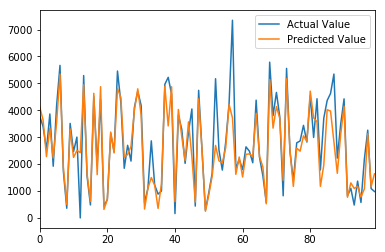

In [182]:
# Plotting predicted vs actual runtime on a training set
true_v_pred.head(100).plot()